<a href="https://colab.research.google.com/github/youngchul-sung/start-tf2-programming/blob/master/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
import numpy as np

# 7.1 SimpleRNN 레이어 생성 코드
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [3]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [4]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.34461868]
 [0.522703  ]
 [0.6552525 ]
 [0.74366874]
 [0.7945035 ]
 [0.815141  ]]


In [6]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.8123374]]
[[0.13207716]]


In [7]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.30368489]
 [0.         0.78910309]
 [0.         0.22245149]
 [0.         0.15271601]
 [0.         0.15455128]
 [0.         0.55559807]
 [0.         0.19988398]
 [0.         0.89911759]
 [0.         0.52737961]
 [0.         0.78205865]
 [0.         0.18558637]
 [0.         0.5023655 ]
 [0.         0.12033025]
 [0.         0.49188363]
 [0.         0.59222643]
 [0.         0.91237911]
 [0.         0.89147605]
 [0.         0.19980285]
 [0.         0.39922542]
 [0.         0.91146961]
 [0.         0.12606129]
 [0.         0.39430348]
 [0.         0.67550638]
 [0.         0.86614383]
 [0.         0.43802091]
 [0.         0.83810176]
 [0.         0.13652229]
 [0.         0.68170204]
 [0.         0.55088314]
 [0.         0.68561036]
 [0.         0.29584247]
 [0.         0.63790272]
 [0.         0.34235445]
 [0.         0.1355643 ]
 [0.         0.84807258]
 [0.         0.51566954]
 [0.         0.02661618]
 [0.         0.36001058]
 [0.         0.59724534]
 [0.         0.76505484]


In [8]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0752 - val_loss: 0.0485
Epoch 2/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0471 - val_loss: 0.0474
Epoch 3/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0473 - val_loss: 0.0497
Epoch 4/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0461 - val_loss: 0.0482
Epoch 5/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0464 - val_loss: 0.0478
Epoch 6/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0458 - val_loss: 0.0475
Epoch 7/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0468 - val_loss: 0.0474
Epoch 8/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0463 - val_loss: 0.0494
Epoch 9/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0464 - val_loss: 0.0477
Epoch 10

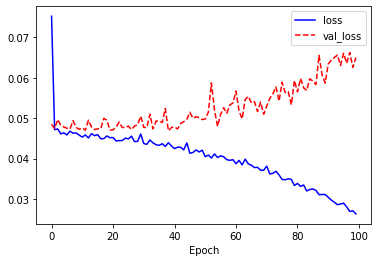

In [10]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [11]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

440/440 [==============================] - 0s 805us/sample - loss: 0.0674
0.3086555988413602 	 0.6564365 	diff: 0.347780904092142
0.0068629519465001464 	 0.48841658 	diff: 0.48155363039946236
0.5237953747841952 	 0.12759723 	diff: 0.3961981470915912
0.08709619625243772 	 0.32435048 	diff: 0.2372542800125159
0.4376509525255051 	 0.15827335 	diff: 0.2793775983527985
correctness: 10.0 %


In [12]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0498 - val_loss: 0.0465
Epoch 2/100
2048/2048 [==============================] - 1s 342us/sample - loss: 0.0450 - val_loss: 0.0465
Epoch 3/100
2048/2048 [==============================] - 1s 352us/sample - loss: 0.0452 - val_loss: 0.0467
Epoch 4/100
2048/2048 [==============================] - 1s 345us/sample - loss: 0.0453 - val_loss: 0.0465
Epoch 5/100
2048/2048 [==============================] - 1s 349us/sample - loss: 0.0450 - val_loss: 0.0465
Epoch 6/100
2048/2048 [==============================] - 1s 343us/sample - loss: 0.0451 - val_loss: 0.0465
Epoch 7/100
2048/2048 [==============================] - 1s 349us/sample - loss: 0.0451 - val_loss: 0.0463
Epoch 8/100
2048/2048 [==============================] - 1s 345us/sample - loss: 0.0450 - val_loss: 0.0464
Epoch 9/100
2048/2048 [==============================] - 1s 344us/sample - loss: 0.0450 - val_loss:

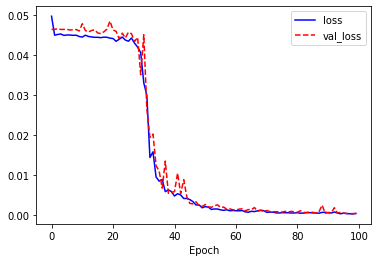

In [14]:
# 7.13 LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
# 7.14 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/440 [==============================] - 0s 1ms/sample - loss: 3.1467e-04
0.3086555988413602 	 0.30174103 	diff: 0.006914565048864452
0.0068629519465001464 	 0.011822302 	diff: 0.004959349947926199
0.5237953747841952 	 0.5153989 	diff: 0.008396455201828301
0.08709619625243772 	 0.08126643 	diff: 0.005829763251873149
0.4376509525255051 	 0.43995708 	diff: 0.0023061297460708063
correctness: 95.22727272727273 %


In [16]:
# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 1ms/sample - loss: 0.0501 - val_loss: 0.0479
Epoch 2/100
2048/2048 [==============================] - 1s 402us/sample - loss: 0.0454 - val_loss: 0.0465
Epoch 3/100
2048/2048 [==============================] - 1s 391us/sample - loss: 0.0451 - val_loss: 0.0471
Epoch 4/100
2048/2048 [==============================] - 1s 384us/sample - loss: 0.0453 - val_loss: 0.0465
Epoch 5/100
2048/2048 [==============================] - 1s 379us/sample - loss: 0.0453 - val_loss: 0.0467
Epoch 6/100
2048/2048 [==============================] - 1s 381us/sample - loss: 0.0452 - val_loss: 0.0463
Epoch 7/100
2048/2048 [==============================] - 1s 377us/sample - loss: 0.0451 - val_loss: 0.0469
Epoch 8/100
2048/2048 [==============================] - 1s 398us/sample - loss: 0.0448 - val_loss: 0.0461
Epoch 9/100
2048/2048 [==============================] - 1s 386us/sample - loss: 0.0450 - val_loss:

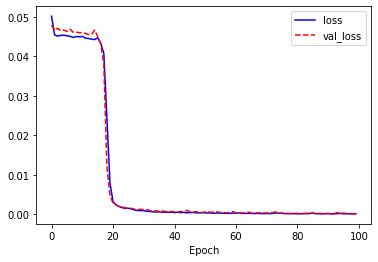

In [18]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/440 [==============================] - 0s 1ms/sample - loss: 2.1837e-04
0.3086555988413602 	 0.30935803 	diff: 0.0007024317162722671
0.0068629519465001464 	 0.0055766366 	diff: 0.0012863153042825103
0.5237953747841952 	 0.5400483 	diff: 0.01625292643574494
0.08709619625243772 	 0.08767998 	diff: 0.0005837859329260453
0.4376509525255051 	 0.4409368 	diff: 0.003285851292243902
correctness: 99.0909090909091 %


In [0]:
# 7.19 Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [21]:
# 7.20 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인해봅니다.
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [22]:
# 7.21 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [23]:
# 7.22 train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


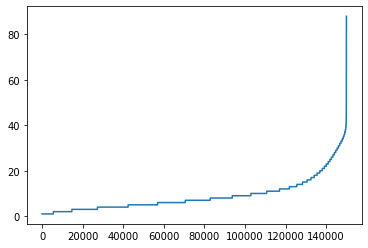

142587


In [24]:
# 7.23 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [25]:
# 7.24 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [26]:
# 7.25 Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [27]:
# 7.26 Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [28]:
# 7.27 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 7.28 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 59s 488us/sample - loss: 0.4335 - accuracy: 0.7849 - val_loss: 0.3874 - val_accuracy: 0.8177
Epoch 2/5
120000/120000 [==============================] - 57s 474us/sample - loss: 0.3249 - accuracy: 0.8480 - val_loss: 0.3916 - val_accuracy: 0.8170
Epoch 3/5
120000/120000 [==============================] - 57s 476us/sample - loss: 0.2718 - accuracy: 0.8699 - val_loss: 0.4086 - val_accuracy: 0.8162
Epoch 4/5
120000/120000 [==============================] - 57s 473us/sample - loss: 0.2266 - accuracy: 0.8895 - val_loss: 0.4917 - val_accuracy: 0.8144
Epoch 5/5
120000/120000 [==============================] - 57s 474us/sample - loss: 0.1919 - accuracy: 0.9050 - val_loss: 0.5661 - val_accuracy: 0.8084


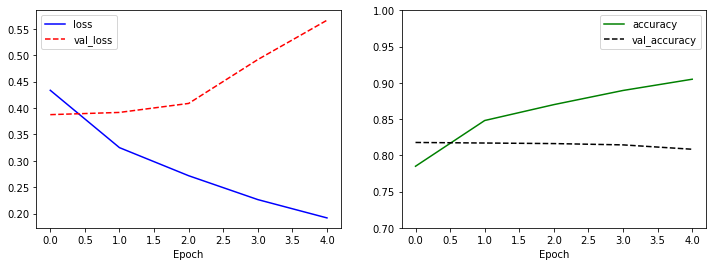

In [30]:
# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [31]:
# 7.30 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.576878777551651, 0.80256]

In [32]:
# 7.31 임의의 문장 감성 분석 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.14346986 0.8565302 ]
['재미있을', '줄']
[0.19314875 0.8068512 ]
['재미있을', '줄', '알았는데']
[0.3304111 0.6695889]
['재미있을', '줄', '알았는데', '완전']
[0.44440296 0.55559707]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.44440296 0.55559707]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.74112785 0.25887218]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9888554  0.01114458]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.9984787  0.00152135]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9984787  0.00152135]


In [0]:
# 7.32 조선왕조실록 데이터 파일 다운로드
path_to_file = tf.keras.utils.get_file('input.txt', 'http://bit.ly/2Mc3SOV')

In [34]:
# 7.33 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print()

# 처음 100 자를 확인해봅니다.
print(train_text[:100])

Length of text: 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [35]:
# 7.34 훈련 데이터 입력 정제
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
    train_text_X.extend(sentence.split(' '))
    train_text_X.append('\n')
    
train_text_X = [word for word in train_text_X if word != '']

print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [36]:
# 7.35 단어 토큰화
# 단어의 set을 만듭니다.
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique words'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for word,_ in zip(word2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(word), word2idx[word]))
print('  ...\n}')

print('index of UNK: {}'.format(word2idx['UNK']))

332640 unique words
{
  '\n':   0,
  '!' :   1,
  ',' :   2,
  '000명으로':   3,
  '001':   4,
  '002':   5,
  '003':   6,
  '004':   7,
  '005':   8,
  '006':   9,
  ...
}
index of UNK: 332639


In [37]:
# 7.36 토큰 데이터 확인
print(train_text_X[:20])
print(text_as_int[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413]


In [38]:
# 7.37 기본 데이터셋 만들기
seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',' '휘']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2 330313]


In [39]:
# 7.38 학습 데이터셋 만들기
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2]
휘
330313


In [0]:
# 7.39 데이터셋 shuffle, batch 설정
BATCH_SIZE = 512
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [41]:
# 7.40 단어 단위 생성 모델 정의
total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 100)           33264000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
dropout (Dropout)            (None, 25, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 332640)            33596640  
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 7.41 단어 단위 생성 모델 학습
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sentence = train_text[0]

    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]
    
    print()
    print(test_sentence)
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Train for 533 steps
Epoch 1/50

 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,

533/533 - 282s - loss: 9.3726 - accuracy: 0.0721
Epoch 2/50
533/533 - 275s - loss: 8.3595 - accuracy: 0.0746
Epoch 3/50
533/533 - 276s - loss: 8.0678 - accuracy: 0.0820
Epoch 4/50
533/533 - 276s - loss: 7.8077 - accuracy: 0.0907
Epoch 5/50
533/533 - 280s - loss: 7.5709 - accuracy: 0.1004
Epoch 6/50

 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  것은 , , 말하기를 , 
 임금이 말하기를 , 
 말하기를 , 
 말하기를 , 
 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 하니 , 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 하니 , 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 하니 , 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 하니 , 임금이

533/533 - 282s - loss: 7.3260 - accuracy: 0.1155
Epoch 

KeyboardInterrupt: ignored

In [43]:
# 7.42 임의의 문장을 사용한 생성 결과 확인
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'

next_words = 100
for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += ' ' + idx2word[output_idx[0]]

print(test_sentence)

동헌에 나가 공무를 본 후 활 십오 순을 쏘았다 아뢰기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 아뢰기를 , 
 그 아뢰기를 , 
 그 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 , 
 아뢰기를 ,


In [44]:
# 7.43 jamotools 설치
!pip install jamotools

In [45]:
# 7.44 자모 분리 테스트
import jamotools

train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
s = train_text[:100]
print(s)

# 한글 텍스트를 자모 단위로 분리해줍니다. 한자 등에는 영향이 없습니다.
s_split = jamotools.split_syllables(s)
print(s_split)

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘
﻿ㅌㅐㅈㅗ ㅇㅣㅅㅓㅇㄱㅖ ㅅㅓㄴㄷㅐㅇㅢ ㄱㅏㄱㅖ. ㅁㅗㄱㅈㅗ ㅇㅣㅇㅏㄴㅅㅏㄱㅏ ㅈㅓㄴㅈㅜㅇㅔㅅㅓ ㅅㅏㅁㅊㅓㄱ·ㅇㅢㅈㅜㄹㅡㄹ ㄱㅓㅊㅕ ㅇㅏㄹㄷㅗㅇㅇㅔ ㅈㅓㅇㅊㅏㄱㅎㅏㄷㅏ 
ㅌㅐㅈㅗ ㄱㅏㅇㅎㅓㄴ ㅈㅣㅇㅣㄴ ㄱㅖㅇㅜㄴ ㅅㅓㅇㅁㅜㄴ ㅅㅣㄴㅁㅜ ㄷㅐㅇㅘㅇ(太祖康獻至仁啓運聖文神武大王)ㅇㅢ ㅅㅓㅇㅇㅡㄴ ㅇㅣㅆㅣ(李氏)ㅇㅛ, ㅎㅟ


In [46]:
# 7.45 자모 결합 테스트
s2 = jamotools.join_jamos(s_split)
print(s2)
print(s == s2)

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘
True


In [47]:
# 7.46 자모 토큰화
# 텍스트를 자모 단위로 나눕니다. 데이터가 크기 때문에 약간 시간이 걸립니다.
train_text_X = jamotools.split_syllables(train_text)
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique characters'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for char,_ in zip(char2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

print('index of UNK: {}'.format(char2idx['UNK']))

6198 unique characters
{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  "'" :   4,
  '(' :   5,
  ')' :   6,
  '+' :   7,
  ',' :   8,
  '-' :   9,
  ...
}
index of UNK: 6197


In [48]:
# 7.47 토큰 데이터 확인
print(train_text_X[:20])
print(text_as_int[:20])

﻿ㅌㅐㅈㅗ ㅇㅣㅅㅓㅇㄱㅖ ㅅㅓㄴㄷㅐㅇ
[6158   83   87   79   94    1   78  106   76   90   78   56   93    1
   76   90   59   62   87   78]


In [49]:
# 7.48 학습 데이터세트 생성
seq_length = 80
examples_per_epoch = len(text_as_int) // seq_length
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

char_dataset = char_dataset.batch(seq_length+1, drop_remainder=True)
for item in char_dataset.take(1):
    print(idx2char[item.numpy()])
    print(item.numpy())
    
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = char_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2char[x.numpy()])
    print(x.numpy())
    print(idx2char[y.numpy()])
    print(y.numpy())
    
BATCH_SIZE = 256
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

['\ufeff' 'ㅌ' 'ㅐ' 'ㅈ' 'ㅗ' ' ' 'ㅇ' 'ㅣ' 'ㅅ' 'ㅓ' 'ㅇ' 'ㄱ' 'ㅖ' ' ' 'ㅅ' 'ㅓ' 'ㄴ'
 'ㄷ' 'ㅐ' 'ㅇ' 'ㅢ' ' ' 'ㄱ' 'ㅏ' 'ㄱ' 'ㅖ' '.' ' ' 'ㅁ' 'ㅗ' 'ㄱ' 'ㅈ' 'ㅗ' ' ' 'ㅇ'
 'ㅣ' 'ㅇ' 'ㅏ' 'ㄴ' 'ㅅ' 'ㅏ' 'ㄱ' 'ㅏ' ' ' 'ㅈ' 'ㅓ' 'ㄴ' 'ㅈ' 'ㅜ' 'ㅇ' 'ㅔ' 'ㅅ' 'ㅓ'
 ' ' 'ㅅ' 'ㅏ' 'ㅁ' 'ㅊ' 'ㅓ' 'ㄱ' '·' 'ㅇ' 'ㅢ' 'ㅈ' 'ㅜ' 'ㄹ' 'ㅡ' 'ㄹ' ' ' 'ㄱ' 'ㅓ'
 'ㅊ' 'ㅕ' ' ' 'ㅇ' 'ㅏ' 'ㄹ' 'ㄷ' 'ㅗ' 'ㅇ' 'ㅇ']
[6158   83   87   79   94    1   78  106   76   90   78   56   93    1
   76   90   59   62   87   78  105    1   56   86   56   93   10    1
   72   94   56   79   94    1   78  106   78   86   59   76   86   56
   86    1   79   90   59   79   99   78   91   76   90    1   76   86
   72   81   90   56   36   78  105   79   99   64  104   64    1   56
   90   81   92    1   78   86   64   62   94   78   78]
['\ufeff' 'ㅌ' 'ㅐ' 'ㅈ' 'ㅗ' ' ' 'ㅇ' 'ㅣ' 'ㅅ' 'ㅓ' 'ㅇ' 'ㄱ' 'ㅖ' ' ' 'ㅅ' 'ㅓ' 'ㄴ'
 'ㄷ' 'ㅐ' 'ㅇ' 'ㅢ' ' ' 'ㄱ' 'ㅏ' 'ㄱ' 'ㅖ' '.' ' ' 'ㅁ' 'ㅗ' 'ㄱ' 'ㅈ' 'ㅗ' ' ' 'ㅇ'
 'ㅣ' 'ㅇ' 'ㅏ' 'ㄴ' 'ㅅ' 'ㅏ' 'ㄱ' 'ㅏ' ' ' 'ㅈ' 'ㅓ' 'ㄴ' 'ㅈ' 'ㅜ' 'ㅇ' 'ㅔ' 'ㅅ' 'ㅓ'
 ' ' 'ㅅ' 'ㅏ' 'ㅁ' 'ㅊ' 'ㅓ' 'ㄱ' '·' 

In [50]:
# 7.49 자소 단위 생성 모델 정의
total_chars = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_chars, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=400),
    tf.keras.layers.Dense(total_chars, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 100)           619800    
_________________________________________________________________
lstm_5 (LSTM)                (None, 400)               801600    
_________________________________________________________________
dense_6 (Dense)              (None, 6198)              2485398   
Total params: 3,906,798
Trainable params: 3,906,798
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 7.50 자소 단위 생성 모델 학습
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 99:
        return
    
    test_sentence = train_text[:48]
    test_sentence = jamotools.split_syllables(test_sentence)

    next_chars = 300
    for _ in range(next_chars):
        test_text_X = test_sentence[-seq_length:]
        test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += idx2char[output_idx[0]]
    
    print()
    print(jamotools.join_jamos(test_sentence))
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=100, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Train for 2364 steps
Epoch 1/100

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 임을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을 것을

2364/2364 - 154s - loss: 2.5918 - accuracy: 0.3060
Epoch 2/100
2364/2364 - 144s - loss: 1.9842 - accuracy: 0.4279
Epoch 3/100


KeyboardInterrupt: ignored

In [52]:
# 7.51 임의의 문장을 사용한 생성 결과 확인
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'
test_sentence = jamotools.split_syllables(test_sentence)

next_chars = 300
for _ in range(next_chars):
    test_text_X = test_sentence[-seq_length:]
    test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += idx2char[output_idx[0]]
    

print(jamotools.join_jamos(test_sentence))

동헌에 나가 공무를 본 후 활 십오 순을 쏘았다. 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 있으니, 임금이 ㅇ
